In [0]:
# Latihan - Konversi Pandas Dataframe

import pandas as pd
import os

os.listdir('sample_data')

df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

In [0]:
# Data Preparation - Normalization

from sklearn.preprocessing import MinMaxScaler

data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]
scaler = MinMaxScaler()
scaler.fit(data)

print(scaler.transform(data))

In [0]:
# Data Preparation - Standarization

from sklearn import preprocessing
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
data

In [0]:
# Latihan SKLearn - Train Test Split

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

len(x_test)

In [0]:
# Latihan SKLearn - Cross Validation Split

import sklearn
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import tree

iris = datasets.load_iris()

x = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()

scores = cross_val_score(clf, x, y, cv=5)
scores

In [0]:
# Latihan SKLearn - Decision Tree -- 1

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_iris

iris = pd.read_csv('Iris.csv')

iris.head()

iris.drop('Id',axis=1,inplace=True)

X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
# melakukan pelatihan model terhadap data
tree_model.fit(X, y)

# tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
tree_model.predict([[6.2, 3.4, 5.4, 2.3]])

In [0]:
# Latihan SKLearn - Decision Tree -- 2

from sklearn.tree import export_graphviz

export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True
)

In [0]:
# Latihan SKLearn - Linear Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
#data harga rummah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

# menampilkan scatter plot dari dataset
%matplotlib inline
plt.scatter(bedrooms, house_price)

bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

In [0]:
# Latihan SKLearn - Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

df = pd.read_csv('Social_Network_Ads.csv')

df.head()

df.info()

data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data

predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
X = data[predictions]
y = data['Purchased'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

In [0]:
# Latihan SKLearn - K-means

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')
# tammpilkan 3 baris pertama
df.head(3)

# ubah namma kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
# tampilkan data yang sudah di preprocess
df.head(3)

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

In [0]:
# Latihan SKLearn -- PCA

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree

iris = datasets.load_iris()
atribut = iris.data
label = iris.target
# bagi dataset menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    atribut, label, test_size=0.2)

decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(X_train, y_train)
model_pertama.score(X_test, y_test)

# membuat objek PCA dengan 4 principal component
pca = PCA(n_components=4)
# mengaplikasikan PCA pada dataset
pca_attributes = pca.fit_transform(X_train)
# melihat variance dari setiap atribut
pca.explained_variance_ratio_

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

In [0]:
# Latihan SKLearn SVM untuk classification

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv('diabetes.csv')

df.head()
df.info()

# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]

# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

In [0]:
# Latihan SKLearn SVR

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv')

data.info()

data.head()

X = data['YearsExperience']
y = data['Salary']
X = X[:,np.newaxis]

model  = SVR(C=1000, gamma=0.05, kernel='rbf')
model.fit(X,y)

plt.scatter(X, y)
plt.plot(X, model.predict(X))

In [0]:
# Latihan SKLearn with Grid Search

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv')

X = data['YearsExperience']
y = data['Salary']
X = X[:,np.newaxis]

model = SVR()
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X, y)

print(grid_search.best_params_)

model_baru  = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))

In [0]:
# Learning - Neural Network - Creating good feature and Building the model

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print(tf.__version__)

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

os.listdir('/tmp/images/train')

os.listdir('/tmp/images/val')

# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Saving 103B20C2-AFB7-47C7-B9F6-9C8C02CB3FC5.jpeg to 103B20C2-AFB7-47C7-B9F6-9C8C02CB3FC5.jpeg
103B20C2-AFB7-47C7-B9F6-9C8C02CB3FC5.jpeg
messy


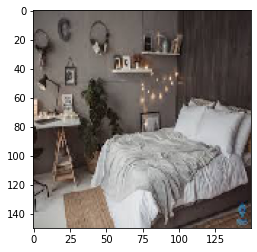

In [14]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')